# Pymaceuticals Inc.
---

### Analysis

- Taking a look at the pie chart that shows us the data of the male to female we can see that it is a very even split being 51% to male and 49% to female. This help eliminate this chances of some medications peforming differently according to sex. 
- The line graph Capomulin treatment of mouseI509, we can see that Capomulin is having a good affect on the tumor decreasing its volume with time. The first few days of taking Capomulin, the tumor volume seems to still be growing however when the medication really kick in within the next few days, it was a pretty dramatic decrease in volume.
- Taking a look at the scatterplot Tumor Volume Distribution by Treatment group we can see the two of the better medications out of the four. In this graph it displays data from all 4 treatments and it is evident that Capomulin and Ramicane seems to keep the final tumor volume the lowest. There is however one outliar from Infubinol that is in the ranges of Capomulin and Ramicane final tumor volume.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
merged['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse = merged[merged[['Mouse ID', 'Timepoint']].duplicated()==True]
dupe_mouse['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
rem_dupe = merged.loc[merged['Mouse ID']!='g989', :]
rem_dupe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = rem_dupe.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sum_stat = cleaned_df.set_index(["Drug Regimen"])
grouped_sum_stat = sum_stat.groupby("Drug Regimen")
mean_stat = grouped_sum_stat["Tumor Volume (mm3)"].mean()
median_stat = grouped_sum_stat["Tumor Volume (mm3)"].median()
var_stat = grouped_sum_stat["Tumor Volume (mm3)"].var()
std_stat = grouped_sum_stat["Tumor Volume (mm3)"].std()
sem_stat = grouped_sum_stat["Tumor Volume (mm3)"].sem()

sum_stat_df = pd.DataFrame({"Mean Tumor Volume" : mean_stat,
                           "Median Tumor Volume" : median_stat,
                           "Tumor Volume Variance" : var_stat,
                           "Tumor Volume STD. Dev." : std_stat,
                           "Tumor Volume STD. ERR." : sem_stat})
sum_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD. Dev.,Tumor Volume STD. ERR.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
sum_stat_aggr = sum_stat.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
sum_stat_aggr
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

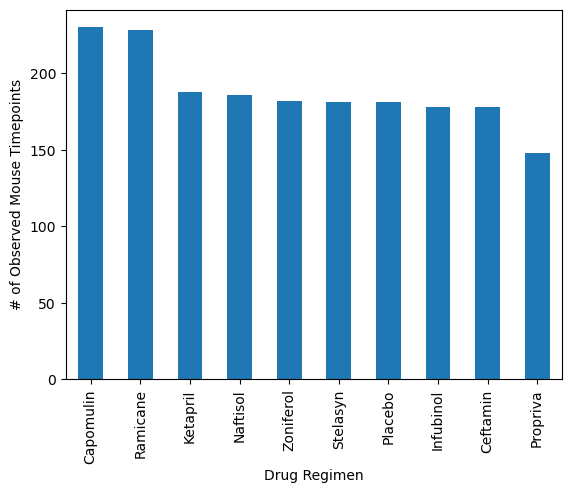

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


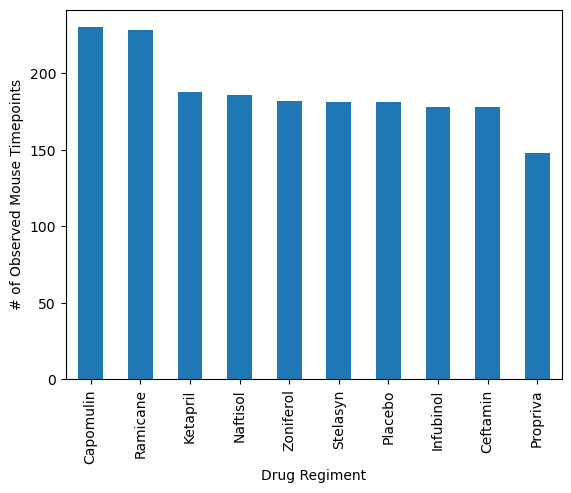

In [9]:
mouse_bar = cleaned_df[['Mouse ID', 'Drug Regimen']]
mouse_bar_count = mouse_bar['Drug Regimen'].value_counts()
mouse_bar_count.plot(kind="bar",
                    xlabel="Drug Regiment",
                    ylabel="# of Observed Mouse Timepoints")
plt.show()

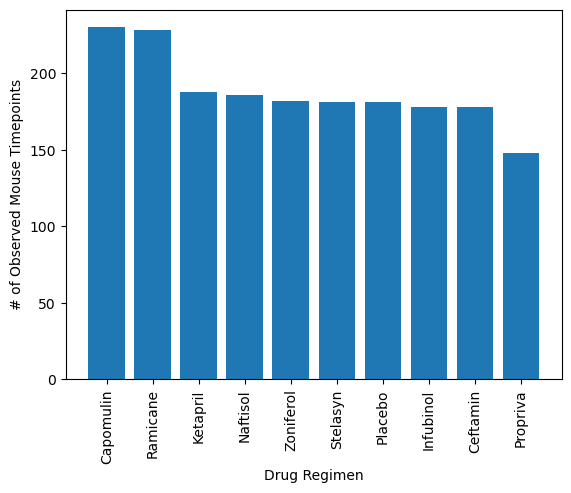

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


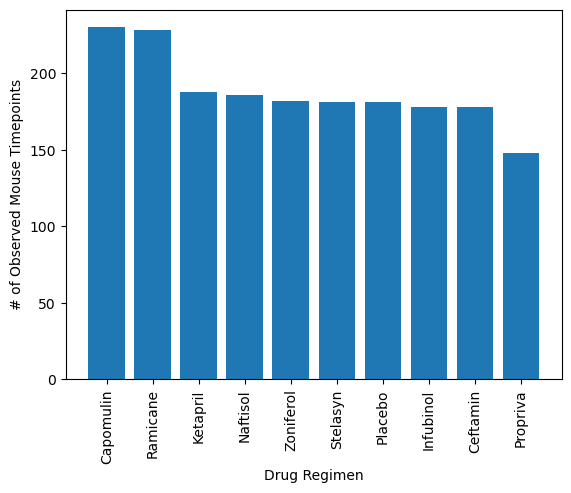

In [10]:
drug_reg = mouse_bar_count.index.values
num_mouse = mouse_bar_count.values
fig, ax = plt.subplots()
ax.bar(drug_reg, num_mouse)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

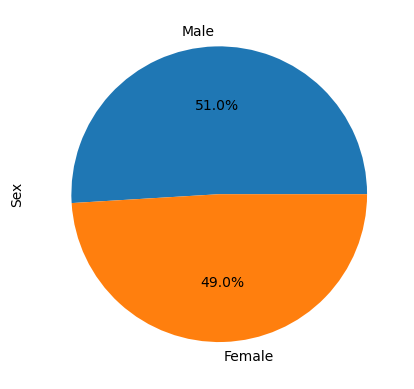

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


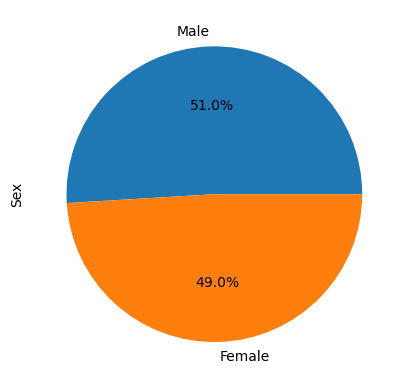

In [11]:
gender = cleaned_df['Sex'].value_counts()
label_genders = ['Male', 'Female']
gender.plot(kind="pie", ylabel="Sex", autopct="%1.1f%%")
plt.show()

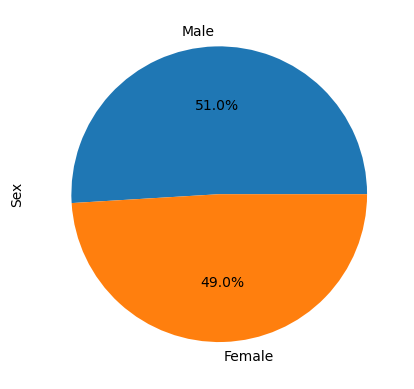

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


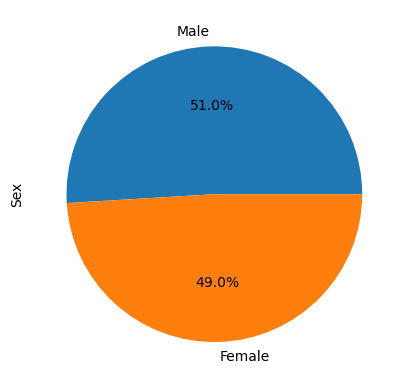

In [12]:
pie_labels = gender.index.values
pie_data = gender.values
fig, ax2 = plt.subplots()
ax2.pie(pie_data, labels=pie_labels, autopct="%1.1f%%")
ax2.set_ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [13]:
four_drugs = cleaned_df.loc[
    (cleaned_df["Drug Regimen"] == "Capomulin") |
    (cleaned_df["Drug Regimen"] == "Ramicane") |
    (cleaned_df["Drug Regimen"] == "Infubinol") |
    (cleaned_df["Drug Regimen"] == "Ceftamin")]
four_drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [14]:
greatest_timepoint = four_drugs.groupby("Mouse ID")["Timepoint"].idxmax()
last_timepoints = four_drugs.loc[greatest_timepoint]
last_timepoints.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
907,a203,45,67.973419,2,Infubinol,Female,20,23
289,a251,45,65.525743,1,Infubinol,Female,21,25
1487,a275,45,62.999356,3,Ceftamin,Female,20,28
470,a411,45,38.407618,1,Ramicane,Male,3,22
480,a444,45,43.047543,0,Ramicane,Female,10,25


In [15]:
new_merged_df = pd.merge(four_drugs, last_timepoints[['Mouse ID', 'Timepoint']],
                         on=['Mouse ID', 'Timepoint'])
new_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [16]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

potential_outliers_dict = {}

for treatment in treatments:
    
    treatment_data = new_merged_df[new_merged_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]  
    q1 = treatment_data.quantile(0.25)
    q3 = treatment_data.quantile(0.75)   
    iqr = q3 - q1 
    lower_bound = q1 - 1.5 * iqr  
    upper_bound = q3 + 1.5 * iqr  
    potential_outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]  
    potential_outliers_dict[treatment] = potential_outliers

for treatment, outliers in potential_outliers_dict.items():
    print(f"{treatment}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 1    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


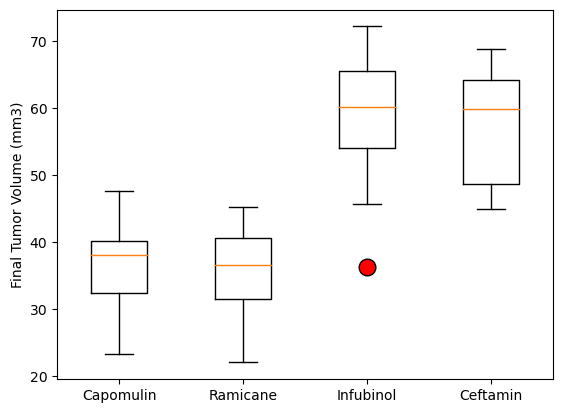

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


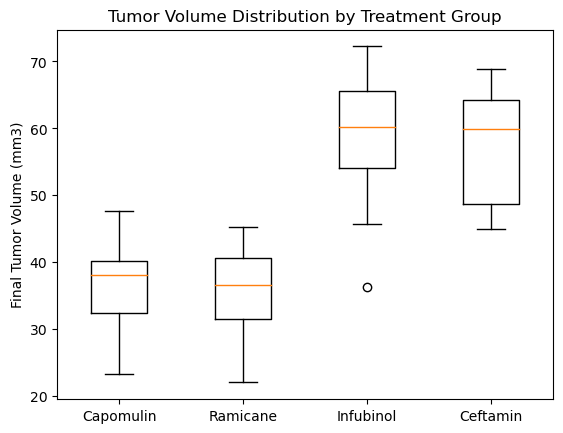

In [17]:
tumor_volume_data = []

for treatment in treatments:
    treatment_data = new_merged_df[new_merged_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_volume_data.append(treatment_data)
    
fig, ax3 = plt.subplots()
ax3.boxplot(tumor_volume_data, labels=treatments)
ax3.set_title("Tumor Volume Distribution by Treatment Group")
ax3.set_ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

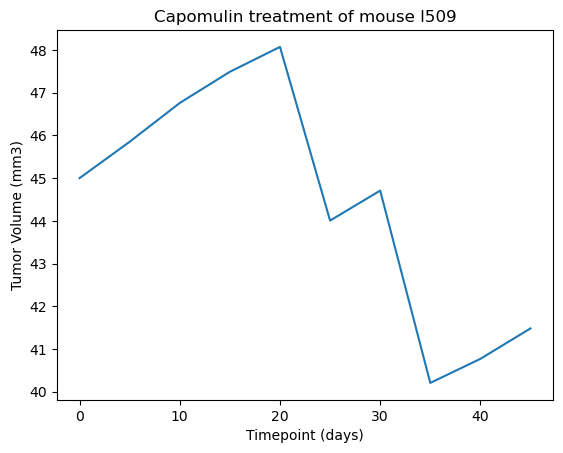

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [18]:
new_merged_df.loc[(new_merged_df["Drug Regimen"] == "Capomulin") & (new_merged_df["Mouse ID"] == "l509")]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
81,l509,45,41.483008,3,Capomulin,Male,17,21


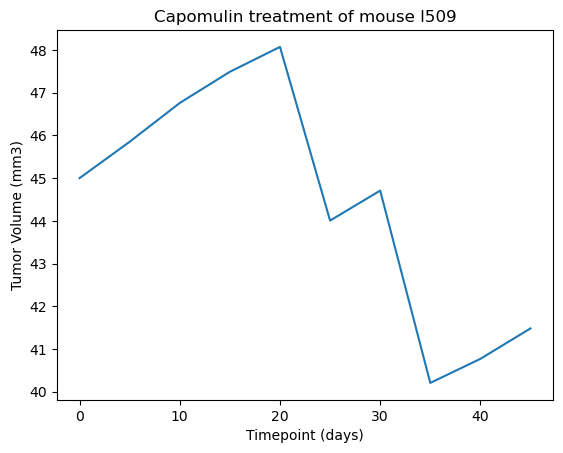

In [19]:
capomulin_treatment = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") & (cleaned_df["Mouse ID"] == "l509")]
capomulin_subject = capomulin_treatment[["Timepoint","Tumor Volume (mm3)"]]
capomulin_subject = capomulin_subject.set_index(["Timepoint"])

tumor_volume = capomulin_subject.values
timepoint = capomulin_subject.index.values

fig, ax4 = plt.subplots()
ax4.plot(timepoint, tumor_volume)
ax4.set_title("Capomulin treatment of mouse l509")
ax4.set_xlabel("Timepoint (days)")
ax4.set_ylabel("Tumor Volume (mm3)")
plt.show()



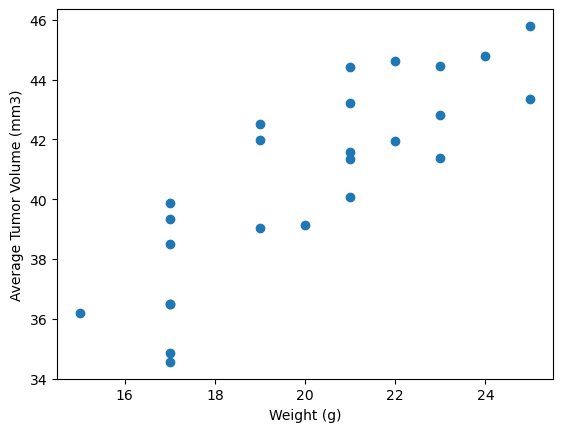

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


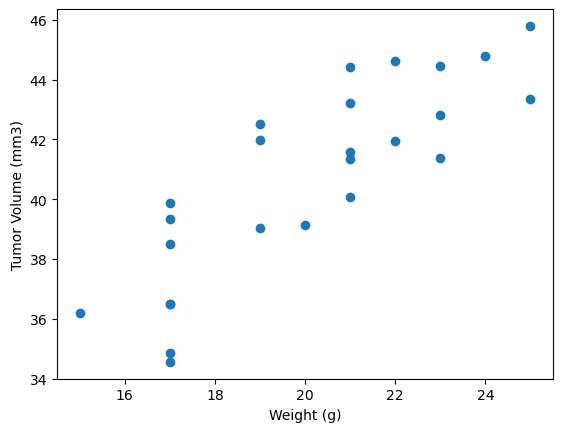

In [20]:
capomulin_scatter = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin")]
grouped_capomulin = capomulin_scatter.groupby("Mouse ID")

mean_tumor = grouped_capomulin[("Tumor Volume (mm3)")].mean()
mean_weight = grouped_capomulin["Weight (g)"].mean()

fig, ax5 = plt.subplots()
ax5.scatter(mean_weight, mean_tumor)
ax5.set_xlabel("Weight (g)")
ax5.set_ylabel("Tumor Volume (mm3)")
plt.show()

In [21]:
mean_capomulin_scatter = pd.DataFrame({"Weight (g)": mean_weight,
                            "Tumor Volume (mm3)": mean_tumor})
mean_capomulin_scatter.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


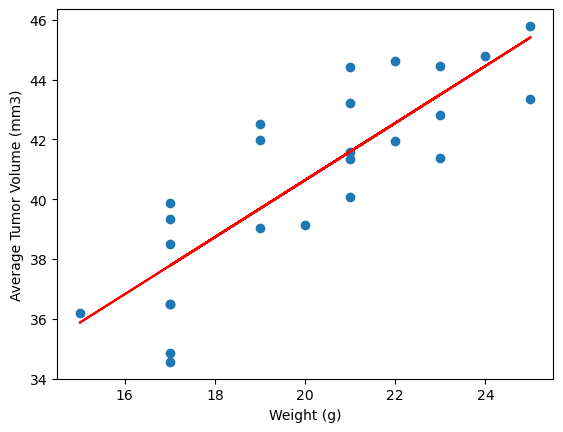

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation between mouse weight and the average tumor volume is 0.84


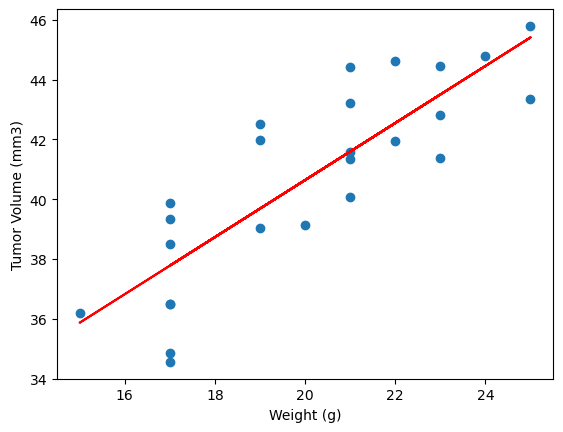

In [24]:
correlation = st.pearsonr (mean_weight, mean_tumor )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_axis=mean_capomulin_scatter["Weight (g)"]
y_axis=mean_capomulin_scatter["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mean_weight, mean_tumor)
regress_values = x_axis * slope + intercept

fig, ax6 = plt.subplots()
ax6.scatter(x_axis,y_axis)
ax6.plot(x_axis,regress_values,"r-")
ax6.set_xlabel("Weight (g)")
ax6.set_ylabel("Tumor Volume (mm3)")
plt.show()